In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ssstrilokh","key":"ca2fec05dad2c178d5148c490a29c7c9"}'}

In [ ]:
import shutil
import os

# Create the directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to ~/.kaggle/
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set the correct permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                         Car Price Dataset                                135KB  2025-01-26 19:53:28          21023        339  1.0              
abdulmalik1518/mobiles-dataset-2025                              Mobiles Dataset (2025)                            20KB  2025-02-18 06:50:24           4585         88  1.0              
mahmoudelhemaly/students-grading-dataset                         Student Performance & Behavior Dataset           508KB  2025-02-17 17:38:46           3893         76  1.0              
adilshamim8/workout-and-fitness-tracker-data                     Worko

In [ ]:
!kaggle datasets download -d hopesb/student-depression-dataset

Dataset URL: https://www.kaggle.com/datasets/hopesb/student-depression-dataset
License(s): apache-2.0
student-depression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip student-depression-dataset.zip

Archive:  student-depression-dataset.zip
replace Student Depression Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
df = pd.read_csv(r'/content/Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.drop(['id'],axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [ ]:
df.describe().round(3)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27898.000,27901.000
mean,25.822,3.141,0.000,7.656,2.944,0.001,7.157,3.140,0.585
std,4.906,1.381,0.044,1.471,1.361,0.044,3.708,1.437,0.493
min,18.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,21.000,2.000,0.000,6.290,2.000,0.000,4.000,2.000,0.000
50%,25.000,3.000,0.000,7.770,3.000,0.000,8.000,3.000,1.000
75%,30.000,4.000,0.000,8.920,4.000,0.000,10.000,4.000,1.000
max,59.000,5.000,5.000,10.000,5.000,4.000,12.000,5.000,1.000


In [ ]:
print(df.isnull().sum()) # Financial Stress column had 3 null values

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
# Replace null value with the median value (effect of Outliers is lesser on median)
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)
df['Financial Stress'].isnull().sum()

<ipython-input-54-e6b04201b9b3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)


0

In [ ]:
# Count unique values in each column
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column} --> {unique_values}")

Gender --> 2
Age --> 34
City --> 52
Profession --> 14
Academic Pressure --> 6
Work Pressure --> 3
CGPA --> 332
Study Satisfaction --> 6
Job Satisfaction --> 5
Sleep Duration --> 5
Dietary Habits --> 4
Degree --> 28
Have you ever had suicidal thoughts ? --> 2
Work/Study Hours --> 13
Financial Stress --> 5
Family History of Mental Illness --> 2
Depression --> 2


In [ ]:
df.duplicated().sum() # No duplicates in the dataset

0

Split dataset into categorical and numerical

In [ ]:
df_cat = df.select_dtypes(include=['object'])
df_cat.info()
df_num = df.select_dtypes(exclude=['object'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Gender                                 27901 non-null  object
 1   City                                   27901 non-null  object
 2   Profession                             27901 non-null  object
 3   Sleep Duration                         27901 non-null  object
 4   Dietary Habits                         27901 non-null  object
 5   Degree                                 27901 non-null  object
 6   Have you ever had suicidal thoughts ?  27901 non-null  object
 7   Family History of Mental Illness       27901 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              

 Association between two categorical variables.

Association with depression column


In [ ]:
from scipy.stats import chi2_contingency
df_cat['Depression'] = df['Depression'].astype('object')
chi2_values = {} #  stores the p-values of the chi-square test for each categorical column
for col in df_cat.columns:
    contingency_table = pd.crosstab(df_cat[col], df_cat['Depression'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # chi2_contingency() is a function from scipy.stats that performs a Chi-Square test for independence.
    # It checks whether the two categorical variables (col and Depression) are statistically independent.
    chi2_values[col] = p

Chi-Square (χ²) tells us how different observed data is from expected data.
p-value tells us whether the difference is statistically significant.

A higher value of chi2 suggests a stronger association between variables

p < 0.05, we reject the null hypothesis and conclude that the variables are likely dependent.

In [ ]:
# We filter out dependent features of df_cat
chi2_values = {key: value for key, value in chi2_values.items() if value < 0.05 and key != 'Depression'}

for key in chi2_values:
    print(key,'-->  ', chi2_values[key])
# Gender, Profession are independent of depression according to data set

City -->   1.4718284584775765e-17
Sleep Duration -->   1.065310789284643e-58
Dietary Habits -->   1.9624854819352487e-260
Degree -->   5.125450008521483e-95
Have you ever had suicidal thoughts ? -->   0.0
Family History of Mental Illness -->   4.9849805086059e-19


In [ ]:
df_cat = df_cat.drop(['Gender','Profession','Depression'],axis = 1)
df_cat.head()

,City,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Visakhapatnam,5-6 hours,Healthy,B.Pharm,Yes,No
1,Bangalore,5-6 hours,Moderate,BSc,No,Yes
2,Srinagar,Less than 5 hours,Healthy,BA,No,Yes
3,Varanasi,7-8 hours,Moderate,BCA,Yes,Yes
4,Jaipur,5-6 hours,Moderate,M.Tech,Yes,No


In [ ]:
# The dataset is divided into two groups based on the
# 'Depression' column because the goal is to compare whether
# there is a statistically significant difference in other numerical variables
# (e.g., Age, BMI, Sleep Hours) between people with depression (1) and without depression (0)

df_num_0 = df_num[df_num['Depression'] == 0]
df_num_1 = df_num[df_num['Depression'] == 1]

df_num_1.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1
8,28.0,3.0,0.0,9.79,1.0,0.0,12.0,3.0,1
9,31.0,2.0,0.0,8.38,3.0,0.0,2.0,5.0,1
10,24.0,3.0,0.0,6.10,3.0,0.0,11.0,1.0,1


In [ ]:
from scipy.stats import ttest_ind

ttest_values = {} # stores the p-values of the t-test for each numerical column
for col in df_num.columns:
    if col != 'Depression':
        t_statistic, p_value = ttest_ind(df_num_0[col], df_num_1[col])
        ttest_values[col] = p_value
        #print(f"{col}: t-statistic={t_statistic}, p-value={p_value}")
ttest_values = {key: value for key, value in ttest_values.items() if value < 0.05}
for key in ttest_values:
    print(key,'-->  ', ttest_values[key])

Age -->   0.0
Academic Pressure -->   0.0
CGPA -->   0.00020706460187857974
Study Satisfaction -->   1.1683786807183397e-175
Work/Study Hours -->   8.598086391535004e-272
Financial Stress -->   0.0


In [ ]:
df_num = df_num.drop(['Work Pressure','Job Satisfaction'],axis = 1)
df_num.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
0,33.0,5.0,8.97,2.0,3.0,1.0,1
1,24.0,2.0,5.90,5.0,3.0,2.0,0
2,31.0,3.0,7.03,5.0,9.0,1.0,0
3,28.0,3.0,5.59,2.0,4.0,5.0,1
4,25.0,4.0,8.13,3.0,1.0,1.0,0


Concat df_cat and df_num

In [ ]:
df = pd.concat([df_cat,df_num],axis = 1)
df.head()

,City,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
0,Visakhapatnam,5-6 hours,Healthy,B.Pharm,Yes,No,33.0,5.0,8.97,2.0,3.0,1.0,1
1,Bangalore,5-6 hours,Moderate,BSc,No,Yes,24.0,2.0,5.90,5.0,3.0,2.0,0
2,Srinagar,Less than 5 hours,Healthy,BA,No,Yes,31.0,3.0,7.03,5.0,9.0,1.0,0
3,Varanasi,7-8 hours,Moderate,BCA,Yes,Yes,28.0,3.0,5.59,2.0,4.0,5.0,1
4,Jaipur,5-6 hours,Moderate,M.Tech,Yes,No,25.0,4.0,8.13,3.0,1.0,1.0,0


Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])
df.head(10)

,City,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
0,51,0,0,3,1,0,33.0,5.0,8.97,2.0,3.0,1.0,1
1,3,0,1,10,0,1,24.0,2.0,5.90,5.0,3.0,2.0,0
2,44,2,0,5,0,1,31.0,3.0,7.03,5.0,9.0,1.0,0
3,49,1,1,7,1,1,28.0,3.0,5.59,2.0,4.0,5.0,1
4,16,0,1,17,1,0,25.0,4.0,8.13,3.0,1.0,1.0,0
5,39,2,0,27,0,0,29.0,2.0,5.70,3.0,4.0,1.0,0
6,46,1,0,10,0,0,30.0,3.0,9.54,4.0,1.0,2.0,0
7,6,2,3,11,0,1,30.0,2.0,8.04,4.0,0.0,1.0,0
8,33,1,1,2,1,0,28.0,3.0,9.79,1.0,12.0,3.0,1
9,37,2,1,12,1,0,31.0,2.0,8.38,3.0,2.0,5.0,1


<Axes: >

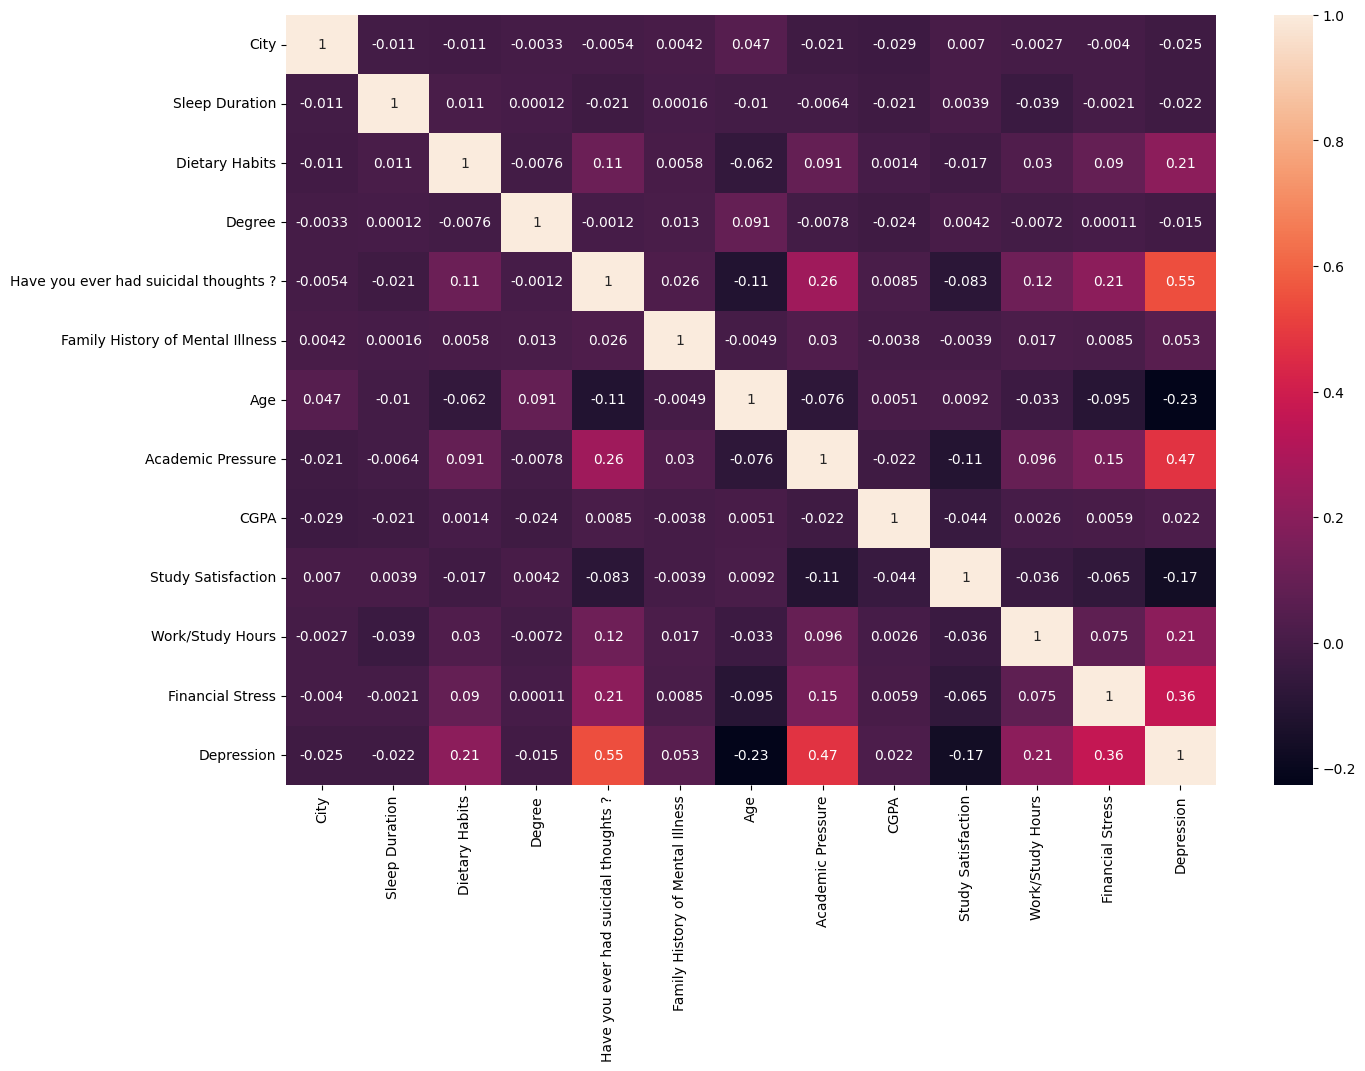

In [ ]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True)

# Outliers analysis

<ipython-input-67-998eb1e9367b>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df, labels=df.columns, patch_artist=True)


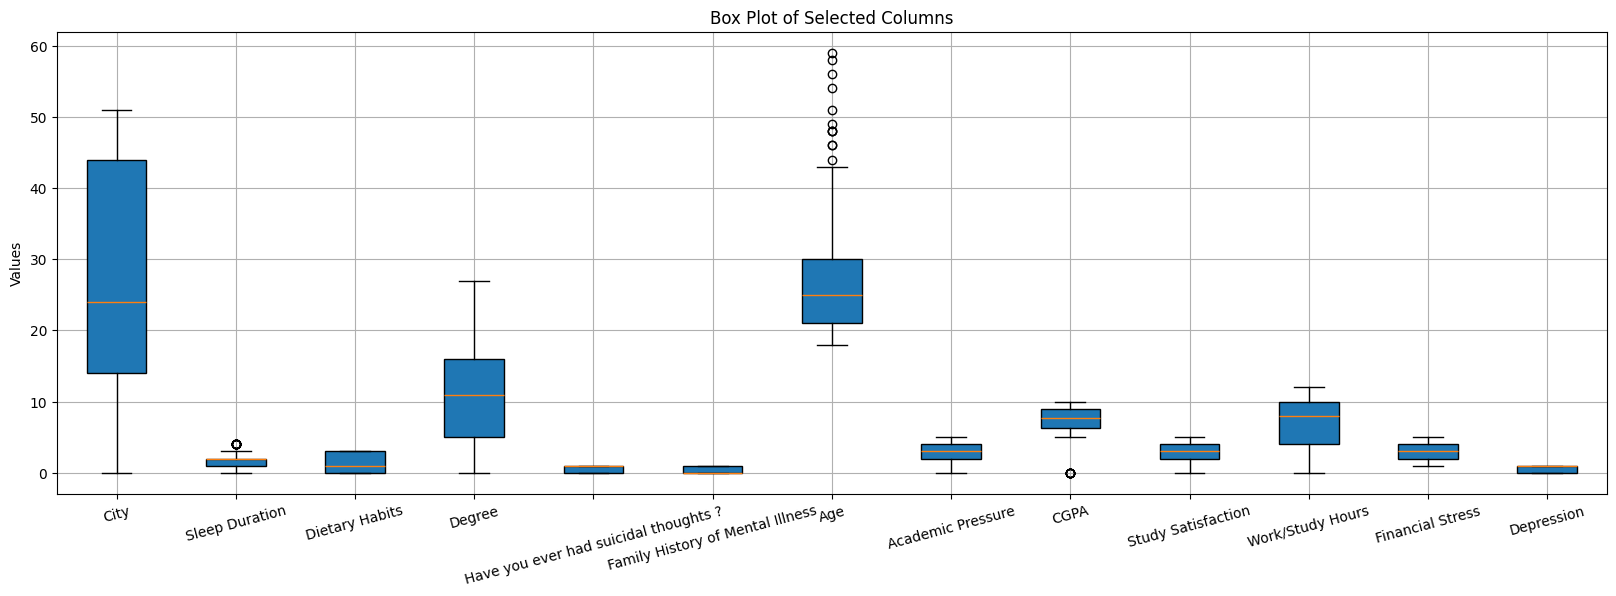

In [ ]:
plt.figure(figsize=(20, 6))
plt.boxplot(df, labels=df.columns, patch_artist=True)

# Customize
plt.title("Box Plot of Selected Columns")
plt.xticks(rotation=15)
plt.ylabel("Values")
plt.grid(True)

# Show plot
plt.show()

Outliers in Sleep Duration:
18


Outliers in Age:
12


Outliers in CGPA:
9




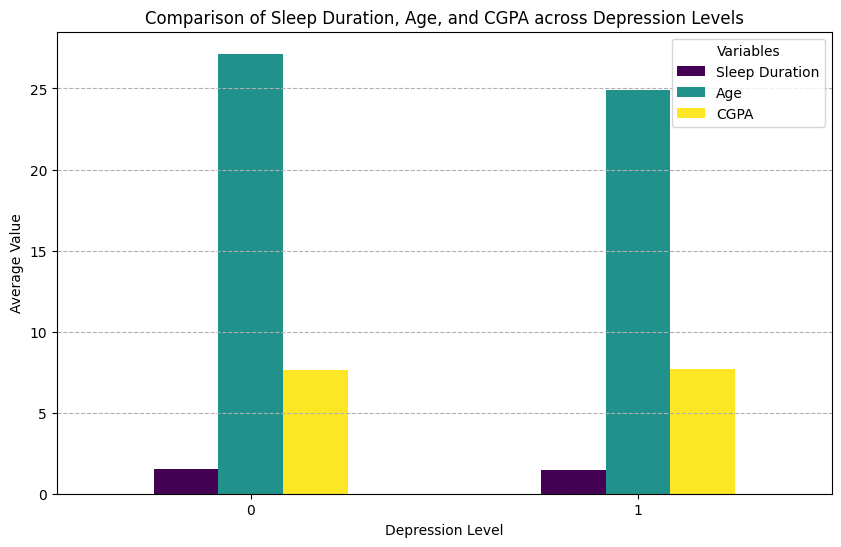

In [ ]:
# Sleep Duration, Age , CGPA had outliers

# Define columns for X-axis and Y-axis
x_columns = ["Sleep Duration", "Age", "CGPA"]
y_column = "Depression"

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
outliers = {}
for col in x_columns:
    outliers[col] = detect_outliers(df, col)
    print(f"Outliers in {col}:")
    print(outliers[col][col].count())
    print("\n")


# Calculate mean values grouped by Depression
df_grouped = df.groupby(y_column)[x_columns].mean()

# Plot grouped bar chart
df_grouped.plot(kind="bar", figsize=(10, 6), colormap="viridis")

# Customize plot
plt.title("Comparison of Sleep Duration, Age, and CGPA across Depression Levels")
plt.xlabel("Depression Level")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Variables")
plt.grid(axis="y", linestyle="--")

# Show plot
plt.show()

# Age is the dominant value

<ipython-input-69-02f31149cf03>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5114153614565786' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isin(outliers[col][col]), col] = mean_value
<ipython-input-69-02f31149cf03>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_columns)


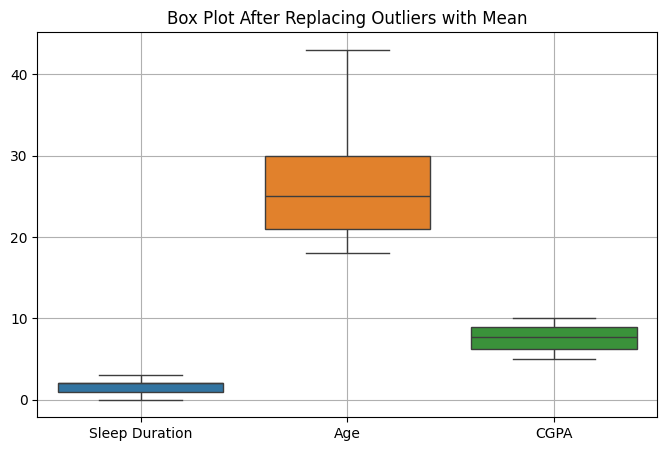

In [ ]:
for col in x_columns:
    mean_value = df[col].mean()
    df.loc[df[col].isin(outliers[col][col]), col] = mean_value

# Plot boxplot after outlier removal
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df[x_columns], patch_artist=True)

# Customize plot
ax.set_xticklabels(x_columns)
plt.title("Box Plot After Replacing Outliers with Mean")
plt.grid(True)
plt.show()

Split train and testing data set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Depression', axis=1), df['Depression'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train.head()

,City,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress
5423,14,1.0,0,11,0,1,20.0,3.0,8.78,4.0,6.0,2.0
11499,3,3.0,1,17,1,0,24.0,1.0,7.04,2.0,0.0,2.0
7746,25,2.0,0,15,1,0,25.0,2.0,6.39,2.0,12.0,2.0
16760,29,1.0,1,5,0,0,28.0,4.0,8.58,4.0,5.0,5.0
10812,50,2.0,3,11,1,1,20.0,5.0,7.25,1.0,11.0,1.0


In [ ]:
y_train.head()

,Depression
5423,0
11499,0
7746,0
16760,0
10812,1


In [ ]:
# Standardize the values
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train, columns=df.drop('Depression', axis=1).columns)
x_test = pd.DataFrame(x_test, columns=df.drop('Depression', axis=1).columns)
x_train.head()

,City,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress
0,-0.751913,-0.480476,-1.180931,0.011407,-1.310787,1.037040,-1.189707,-0.108411,0.758391,0.783351,-0.315088,-0.787868
1,-1.422549,1.403492,-0.371739,0.843174,0.762900,-0.964283,-0.371499,-1.560585,-0.432260,-0.686632,-1.935824,-0.787868
2,-0.081277,0.461508,-1.180931,0.565918,0.762900,-0.964283,-0.166947,-0.834498,-0.877043,-0.686632,1.305649,-0.787868
3,0.162591,-0.480476,-0.371739,-0.820361,-1.310787,-0.964283,0.446709,0.617676,0.621534,0.783351,-0.585211,1.297382
4,1.442896,0.461508,1.246644,0.011407,0.762900,1.037040,-1.189707,1.343763,-0.288561,-1.421623,1.035526,-1.482951


In [ ]:
rfc = RandomForestClassifier()
model = rfc.fit(x_train,y_train)
model.score(x_test,y_test)

0.8417154461832517

In [ ]:
rfc = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100],   # Number of trees
    'max_depth': [None, 10, 20],   # Depth of trees
    'min_samples_split': [2],   # Min samples to split a node
    'min_samples_leaf': [1, 2]      # Min samples in a leaf
}

# GridSearchCV: Find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train RandomForest with best params
best_rfc = grid_search.best_estimator_
best_rfc.fit(x_train, y_train)

# Test accuracy
test_accuracy = best_rfc.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.841321044546851
Test Accuracy: 0.8444630271174293


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(rfc, param_grid, n_iter=5, cv=3, random_state=42, n_jobs=-1, verbose=1)
random_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Test Accuracy:", random_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
